## **Customer Analytics Capstone Project**



---



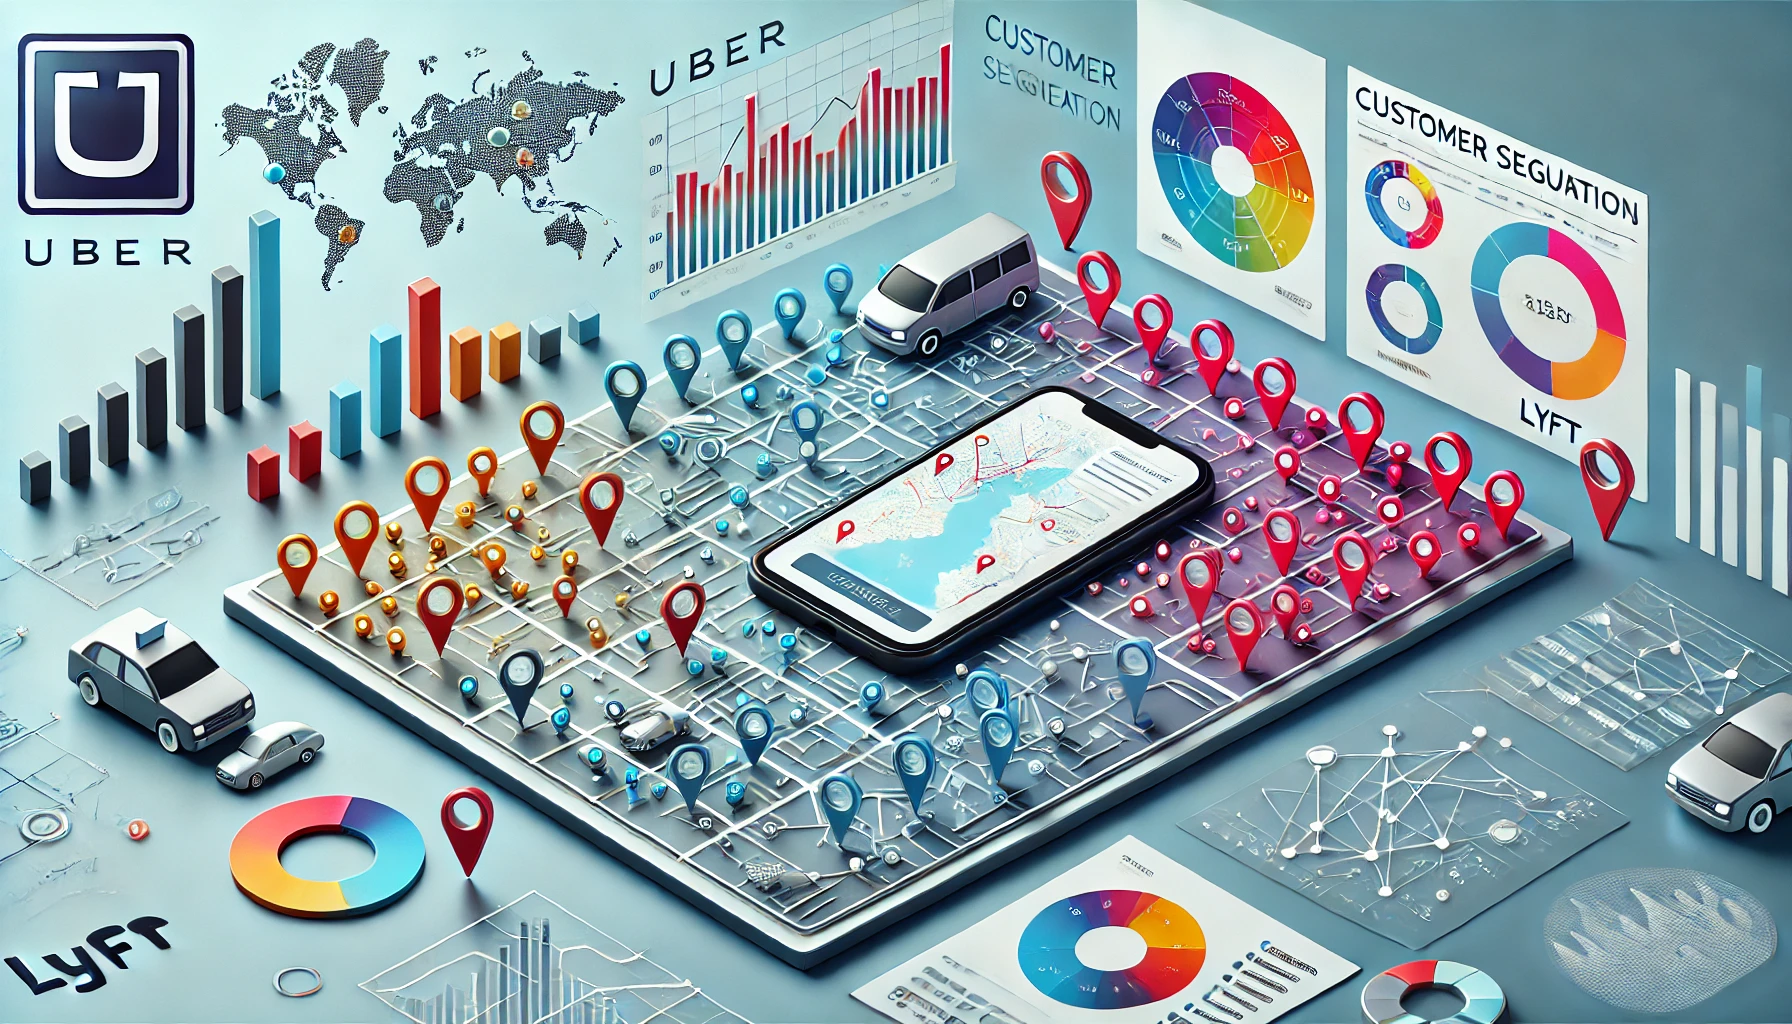

## **1. Business Logic:**


---



**Uber-Lyft Dataset:** https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma


Our **objective** is to determine different segments based on thier ride patterns and behaviours and create business strategies to help ride companies with the increase in customers. The aim is to help ride companies with the business logic and marketing strategies to achieve the target.The Uber and Lyft Dataset includes all data regarding the ride-hailing services in Boston, Massachusetts provided to study the behaviors for similar rental services. The available data enable understanding of factors that affect ride selection, leading to its categorization and corresponding business models.

The dataset further helps capture the most important features that define the ride-sharing business in Boston. When did, it will enable the ride-sharing corporations to categorize customers, design the most suitable promotions, and design alterations that could augment consumers’ satisfaction and boost growth.

Without these data it is impossible to develop the right business logic and, at the same time, this data provides the basis for data-driven decision-making that can result in gaining a competitive advantage in the ride-sharing segment.

#### **Customer Segmentation Stratgies:**

* We will study the dataset for all kinds of cab_types which will help us understand what possible strategies we can use to achieve the target.

* Customer Segmentation means dividing customers with similar features into distinct groups so that we can provide services according to their requirements.

* In our Dataset, customer segments will help us to find the pattern of the dataset, for example, different kinds of rides, location, time, and many other features.

* Let's find what all are there in the dataset.
Companies can offer a membership or a discount services  to the customers who have a long distance journey to hold the customers.


* In our dataset, we’re looking to segment ride-sharing customers based on various segmentation ideas like hour, day of the week, common pick-up point, common destination point, cab types, and distances traveled.
Let's see them one by one:


> 1.  **Time Segment**

> 2. **Day segment**

> 3. **Source Segment**

> 4. **Destination Segement**

> 5. **Cab Segment**

> 6. **Distance Segment**


*   This segmentation groups the distance from the source to the destination for each customer, it will help to decide short, mid, and long-distance riders.

*   Short-distance riders can complete their rides witin few minutes while long distance riders will take a few hours to complete the journey.


*    Companies can offer a membership or a discount services  to the customers who have a long distance journey to hold the customers.

## **2. Data understanding:**


---



In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
rideShare = pd.read_csv('/content/rideshare_kaggle.csv')
rideShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
print("Number of rows:", rideShare.shape[0])
print("Number of columns:", rideShare.shape[1])
print("Number of Duplicates:", rideShare.duplicated().sum())
numeric_columns = rideShare.columns[rideShare.dtypes != object]
categorical_columns = rideShare.columns[rideShare.dtypes == object]
print("Numeric columns:", len(numeric_columns))
print("Categorical columns:", len(categorical_columns))

Number of rows: 693071
Number of columns: 57
Number of Duplicates: 0
Numeric columns: 46
Categorical columns: 11


In [ ]:
print("Uber personal data:", (rideShare['cab_type'] == 'Uber').sum())
print("Lyft personal data :", (rideShare['cab_type'] == 'Lyft').sum())

Uber personal data: 385663
Lyft personal data : 307408



> The dataset contains 0 duplicate values. 46 numerical columns and 11 categorical columns. The complete dataset contains 693071 rows, in which 385663 contains information about Uber's personal data while 307408 provides information about lyft's data. 57 features are available in the dataset which give detailed information about the ride including the weather, time, start and end location. Let's see the difference through the visualization.



We don't have appropriate product information in the dataset,it would have been the most essential feature for the segmentation but now because of inappropriate data we can drop this variable.

In [ ]:
rideShare['product_id'].unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2',
       '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'], dtype=object)


#### **Dropping Unnecessary columns**



---




> Since we have 57 columns in the dataset, Some columns are not necessary for our simple use case. The necessary features which are actually making an impact on our predictions we will keep these columns and rest we will drop.




In [ ]:
unnecessary_columns = [ 'id', 'timezone', 'timestamp', # Added a comma after 'timestamp'
'product_id',
'latitude', 'longitude', 'temperature',
'short_summary',
'long_summary',
'icon',
'apparentTemperature',
'precipIntensity' ,
'humidity',
'windSpeed',
'windGust', 'temperatureHigh',
'apparentTemperatureHigh',
'dewPoint',
'temperatureLow',
'temperatureLowTime',
'apparentTemperatureLowTime',
'apparentTemperatureHigh',
'pressure',
'precipProbability',
'precipIntensityMax',
'apparentTemperatureMax',
'cloudCover',
'moonPhase',
'windGustTime',
'visibility',
'temperatureHighTime' ,
'apparentTemperatureHighTime',
'apparentTemperatureLow' ,
'temperatureMin',
'temperatureMax',
'temperatureMinTime' ,
'temperatureMaxTime',
'apparentTemperatureMin',
'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
'windBearing' ,
'sunriseTime',
'uvIndex' ,
'visibility.1',
'ozone',
'sunsetTime', 'uvIndexTime']

rideShare = rideShare.drop(unnecessary_columns, axis=1)

In [ ]:
rideShare.shape

(693071, 11)

## 3. **Exploratory Data Analysis:**


---



After dropping a few columns, we have 11 columns in our dataset.


* **hour:**

Represents the exact hour of the day when a ride was ordered. It is useful in distinguishing the periods where many/stable/ few people may require a ride and these include morning, evening, night and any other time of the day.

* **day:**

The date of the month when the ride was arranged. It can also assist in finding out the actual day patterns which might be special date and thus form part of the demand.

* **month:**  

The month of the year the ride was requested Putting more emphasis on the best months of the year to request for a ride. Daily and weekly data can show oscillation in the ride demand throughout the week and even throughout the year due to the changing weather.

* **datetime:**

A single timestamp for the ride request by combining the date and time for the ride request. The timing of this column can be stated with much accuracy though it can be split down to the hour, day and month dimensions for further analysis.

* **source:**

It Indicates the start point of the ride usually in form of an integer. Relative drop off zones might show some area attractiveness and potentially group passengers by the need-based location.

* **destination:**

The place where a ride is being discontinued and also represented by an integer. Popular destinations could be useful to help segment destinations of customer or to analyze patterns of riding.

* **cab_type:**

Specifies whether the person called for an Uber or Lyft, for instance. This can help in understanding the customers own between service providers.

* **name:**

The subclass of services within a cab service, usually denoted by an app or company name (Uber, Lyft). This extends specific customers’ preference and ride categorization according to service classes or automobiles’ categories.

* **price:**

The time that the ride takes, usually expressed in hours and in exceptional circumstances accompanied by the distance of the ride, often in miles or kilometers. This can have a direct relationship with the time spent offering a ride or the amount of money that’s to be charged and helpful in anticipating the demand per short distance riding as opposed to longer distance.

* **distance:**

The distance of the ride, typically in miles or kilometers. This can directly impact ride duration and price and is useful in predicting demand for short vs. long-distance travel.

* **surge_multiplier:**

An extra charge that is added when there are a lot of people using a given Uber car to travel to a particular location, which will help to push up the price of a ride. This earns the case surge pricing as a demand pressure worth using in identifying and forecasting changes in prices based on varying demand levels.

#### **Checking and Handling Missing values**


---



In [ ]:
rideShare.isnull().sum()

,0
hour,0
day,0
month,0
datetime,0
source,0
destination,0
cab_type,0
name,0
price,55095
distance,0


In [ ]:
rideShare.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0




> Since we have 6,93,071 total rows and in that 55,095 rows contain missing values (around 9% of the dataset), Let's discuss how dropping missing value-rows won't impact our dataset:



*   Even after dropping 55,095 rows we still will have suffiecient data for training Machine Learning models.

*   Our dataset is based on real-time scenario which means rows are not connected with each other and dropping rows will not affect the segmentation.





In [ ]:
rideShare.dropna(inplace=True)
rideShare.shape

(637976, 11)

##### Fix the date

In [ ]:
rideShare['datetime'] = pd.to_datetime(rideShare['datetime'])


#### **Feature Engineering:**
---




> lets create a new column which will explain about the timezone whether it is 'Daytime' or 'Nightime'.






In [ ]:
rideShare['timezone'] = rideShare['datetime'].dt.hour.apply(lambda x: 'Daytime' if x >= 6 < 18 else 'Nightime')
rideShare['timezone'].unique()

array(['Daytime', 'Nightime'], dtype=object)



#### **Data Visualization:**

---







**Ride prices based on the Timezone**

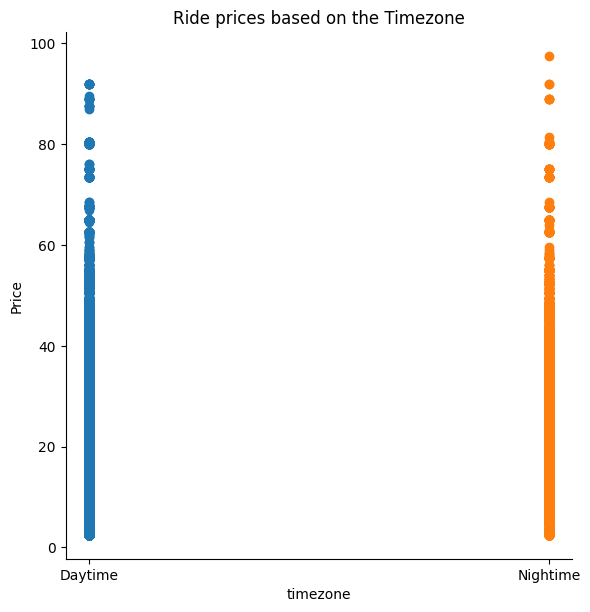

In [ ]:
timezone_vis = sns.FacetGrid(rideShare, hue='timezone', height = 6)
timezone_vis.map(plt.scatter, 'timezone', 'price')
plt.title('Ride prices based on the Timezone')
plt.ylabel('Price')
plt.show()

**Counting the frequency of each cab type**

In [44]:
cab_type_counts = rideShare['cab_type'].value_counts().reset_index()
cab_type_counts.columns = ['cab_type', 'count']
fig = px.bar(cab_type_counts, x='cab_type', y='count')
fig.update_layout(xaxis=dict(title='cab_type', tickvals=[0, 1],ticktext=['Lyft', 'Uber']), width=800, height=500)
fig.show()

**Price vs cab_type**

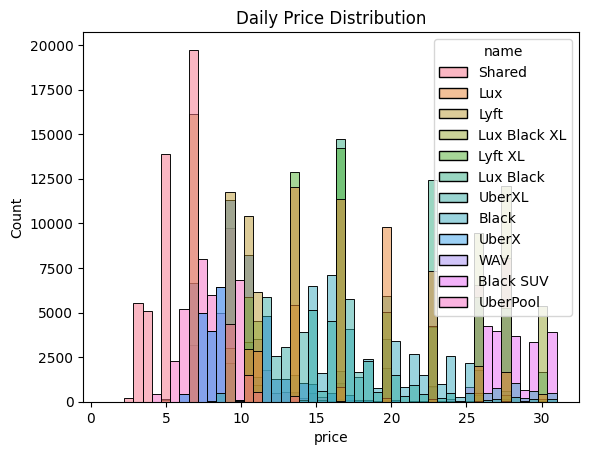

In [ ]:
sns.histplot(x='price', data=rideShare, bins = np.linspace(1,31), hue='name')
plt.title("Daily Price Distribution")
plt.show()

**Average Ride Price Over Months**

In [49]:
rideShare['ym'] = rideShare['datetime'].dt.to_period('M')
plot1 = rideShare.groupby('ym')['price'].mean().reset_index()
plot1['ym'] = plot1['ym'].dt.to_timestamp()
fig = px.line(plot1, x='ym', y='price', markers=True,
                  title='Average Ride Price Over Months', labels={'ym': 'Month', 'price': 'Average Price'}, width=800, height=500)
fig.show()

#### Data type Conversion


---

Let's convert the categorical variables into encoding

In [ ]:
cat_columns = rideShare.columns[rideShare.dtypes == object]
for i in cat_columns:
  le = LabelEncoder()
  rideShare[i] = le.fit_transform(rideShare[i])

rideShare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   hour              637976 non-null  int64         
 1   day               637976 non-null  int64         
 2   month             637976 non-null  int64         
 3   datetime          637976 non-null  datetime64[ns]
 4   source            637976 non-null  int64         
 5   destination       637976 non-null  int64         
 6   cab_type          637976 non-null  int64         
 7   name              637976 non-null  int64         
 8   price             637976 non-null  float64       
 9   distance          637976 non-null  float64       
 10  surge_multiplier  637976 non-null  float64       
 11  timezone          637976 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 63.3 MB


### **Customer Segmentation Ideas:**

---





Customer Segmentation means dividing customers with similar features into distinct groups so that we can provide services according to their requirements. In our Dataset, customer segments will help us to find the pattern of the dataset, for example, different kinds of rides, location, time, and many other features. Let's find what all are there in the dataset.
Companies can offer a membership or a discount services  to the customers who have a long distance journey to hold the customers.
In our dataset, we’re looking to segment ride-sharing customers based on various segmentation ideas like hour, day of the week, common pick-up point, common destination point, cab types, and distances traveled.
Let's see them one by one:






> 1.  **Time Segment:**


*   It will fetch information about hour of a day, whether the customer is a Morning commuter or an Evening commuter
*   It will help to merge the same group of people and increase the number of customers and we can supply offers on peak demand times.





> 2. **Day segment:**


*   It will fetch information about a day of the week, whether the customer commuting on weekdays or weekdays for school or a work
*   The goal is to group all the same group of people and increase the number of customers and we can supply offers on peak demand times.






> 3. **Source Segment:**


*   It will identify common pick-up locations so that in the future we can do uberShare for people who live nearby locations while going to work and school.





> 4. **Destination Segement:**

*   It will identify common drop-off locations so that in the future
*   We can do uberShare for people who live nearby locations while coming back from the workplace or from the university.





> 5. **Cab Segment:**


*   This segmentation is based on the cab type, just to see how many people likes to commute by lyft and uber.
*    when we understand this preferences it will be easy for a particular compnies with the offers and discounts and it will help to add on more marketing strategies to gain more customers.






> 6. **Distance Segment:**




*   This segmentation groups the distance from the source to the destination for each customer, it will help to decide short, mid, and long-distance riders.
*   Short-distance riders can complete their rides witin few minutes while long distance riders will take a few hours to complete the journey.

*    Companies can offer a membership or a discount services  to the customers who have a long distance journey to hold the customers.











In [ ]:
def segments(customer):
  #time_segment
  if customer['hour'] < 12:
    timeSegment = 'Morning Commuter'
  else:
    timeSegment = 'Evening commuter'

  #day_segment
  if customer['day'] < 5:
    daySegment = 'Weekday commuter'
  else:
    daySegment = 'Weekend wanderlust'

  #Common pick-up and destination points
  sourceSegment = f'Pickup Point {customer["source"]}'
  destinationSegement = f'Destination Point {customer["destination"]}'

  #cab_types segments
  cabSegment = 'Uber lovers' if customer['cab_type'] == 0 else 'Lyft lovers'

  #segment by distance
  if customer['distance'] < 2:
    distSegment = 'Short Distance Rider'
  elif customer['distance'] < 10:
    distSegment = 'Mid Rider'
  else:
    distSegment = 'Lon distance commuter'


  return pd.Series([timeSegment, daySegment, sourceSegment, destinationSegement, cabSegment, distSegment])


In [ ]:
rideShare[['timeSegment', 'daySegment', 'sourceSegment', 'destinationSegement', 'cabSegment', 'distSegment']] = rideShare.apply(segments, axis = 1)
#Execution time(due to large-scale data) = 2m 35s

In [ ]:
segment_encoded = pd.get_dummies(rideShare, columns = ['timeSegment', 'daySegment', 'sourceSegment', 'destinationSegement', 'cabSegment', 'distSegment'])

In [27]:
segment_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 44 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   hour                                      637976 non-null  int64         
 1   day                                       637976 non-null  int64         
 2   month                                     637976 non-null  int64         
 3   datetime                                  637976 non-null  datetime64[ns]
 4   source                                    637976 non-null  int64         
 5   destination                               637976 non-null  int64         
 6   cab_type                                  637976 non-null  int64         
 7   name                                      637976 non-null  int64         
 8   price                                     637976 non-null  float64       
 9   distance            

## **4. Data Modeling:**


---



*   I wanted to check the results for different Machine Learning models, I tried Random Forest Regressor, Linear Regression, and XG Boost algorithms. We got good results with the Random Forest Regressor and XB Boost model.


*   This is a clustering analysis. It is an unsupervised machine learning method that groups customers based on their similarities, ensuring that customers within the same group (or cluster) are more alike than those in other groups.

* Splitting data into train test split




In [29]:
X = segment_encoded[['timeSegment_Evening commuter',
'timeSegment_Morning Commuter',
'daySegment_Weekday commuter',
'daySegment_Weekend wanderlust',
'sourceSegment_Pickup Point 0',
'sourceSegment_Pickup Point 1',
'sourceSegment_Pickup Point 2',
'sourceSegment_Pickup Point 3',
'sourceSegment_Pickup Point 4',
'destinationSegement_Destination Point 0',
'destinationSegement_Destination Point 1',
'destinationSegement_Destination Point 2',
'destinationSegement_Destination Point 3',
'destinationSegement_Destination Point 4',
'cabSegment_Lyft lovers',
'cabSegment_Uber lovers',
'distSegment_Mid Rider',
'distSegment_Short Distance Rider']]

y = rideShare['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


> **Random Forest Regressor:**



In [59]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X,y)

RandomForestRegressor(random_state=42)

In [68]:
rfr_pred = rfr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, rfr_pred))
print("MSE:", mean_squared_error(y_test, rfr_pred))
print("R-squared:", r2_score(y_test, rfr_pred))

MAE: 7.092460438416316
MSE: 76.62297612999258
R-squared: 0.12109882188735377



> **XGBoost:**



A strategy that can be used in regression problems, given that data is complicated and we desire a model that can learn non-linear features well is XGBoost. XGBoost has been found to be very effective and its implementation time is very fast, it can handle large data sets as well.

In [64]:
xgModel =  xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgModel.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [69]:
xgModel_pred = xgModel.predict(X_test)
print("MAE:", mean_absolute_error(y_test, xgModel_pred))
print("MSE:", mean_squared_error(y_test, xgModel_pred))
print("R-squared:", r2_score(y_test, xgModel_pred))

MAE: 7.09459423557853
MSE: 76.6760255899238
R-squared: 0.12049031990548509



> **Linear Regression:**



In [97]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [98]:
LR_pred = LR.predict(X_test)
print("MAE:", mean_absolute_error(y_test, LR_pred))
print("MSE:", mean_squared_error(y_test, LR_pred))
print("R-squared:", r2_score(y_test, LR_pred))

MAE: 7.178102210786388
MSE: 78.64425858214109
R-squared: 0.09791377194257145


I want to check the results for different Machine Learning models, I tried Random Forest Regressor, Linear Regression, and XG Boost algorithms. We got good results with the Random Forest Regressor and XB Boost model.

## **5. Model Evaluation:**


---



In [100]:
Rmetrics = {
    'Random Forest REgressor': {'MAE': 7.09, 'MSE': 76.66, 'R-squared:': 0.12},
    'XG Boost': {'MAE': 7.09, 'MSE': 76.66, 'R-squared:': 0.12},
    'Linear Regression': {'MAE': 7.17, 'MSE': 78.64, 'R-squared:': 0.09}
}

Rmetrics = pd.DataFrame.from_dict(Rmetrics, orient='index')
print("Model Evaluation")
print(Rmetrics)

Model Evaluation
                          MAE    MSE  R-squared:
Random Forest REgressor  7.09  76.66        0.12
XG Boost                 7.09  76.66        0.12
Linear Regression        7.17  78.64        0.09






> **1. Mean Absolute Error (MAE):**



*   **Random Forest and XGBoost:** It is also to be noted that both the models have same MAE that is 7.09; which means that the average prophecy error is similar between two models. This implies that on average their predictions are approximately equal to 7.09 units away from the actual values.
*   **Linear Regression:** The other evaluation metric was mean absolute error (MAE) which is slightly higher at 7.17, implying that it has relatively lower ability in predicting the performance of the models than LM and MBD.




> **2. Mean Squared Error (MSE):**




*   **Random Forest and XGBoost:** They also both have the same MSE of 76.66, which shows the amount of the squared error in the average of the prediction in both models were similar.
*   **Linear Regression:** The MSE of the model is 78.64 Ky for the test data, and is again slightly larger compared with the other two models. This means that, the MSE of Linear Regression model is high due to large errors as compared to Random Forest and XGBoost models as MSE consider large errors par to small ones.




> **3. R-squared (R²):**



*   **Random Forest and XGBoost:** As for the models, the models are compared by R-squared equal to 0.12 for both, which means that only 12% of the changes in the target variable are caused by the used features. This implies that the models can be said to have low reliability on the variance in the data that is being analyzed.

*   **Linear Regression:** Linear Regression has the least amount of variance explained in the data the R² of 0.09 which is equivalent to 9% hence proving to be the weakest as an ensemble method.









